In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,area,circularity,extent,perimeter,solidity
0,527,0.42862,0.60297,124.30,0.78074
1,291,0.31266,0.59877,108.15,0.88450
2,573,0.32199,0.50087,149.54,0.68214
3,536,0.13738,0.19648,221.42,0.33967
4,553,0.31874,0.53173,147.66,0.69912


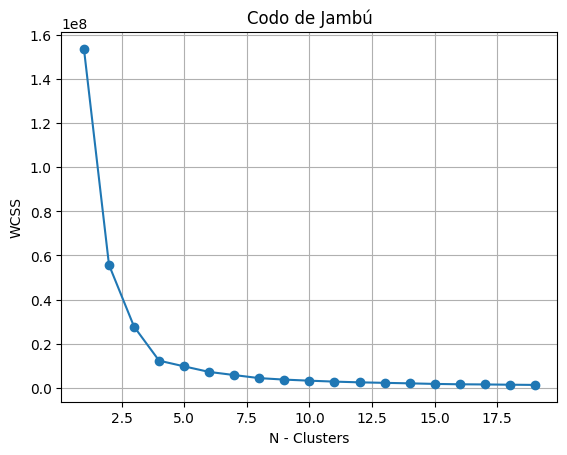

In [2]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for j in range(1,20):
    # print('Realizando kMeans con ' + str(j) + " kluster's")
    kmeans = KMeans(n_clusters=j)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss,'o-')
plt.title("Codo de Jambú")
plt.xlabel('N - Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [3]:
import numpy as np
import math

data = pd.DataFrame(df).to_numpy()
centroids = pd.DataFrame(df.sample(5)).to_numpy()

def euclideanDistance(data, centroids):
	dist = np.zeros(5)
	for currentCentroid in range(5):
		dist[currentCentroid] += math.dist(data, centroids[currentCentroid])
	return np.sqrt(dist)

print("[ Iniciando clusterizacion ]")

labels = np.zeros(len(data))
labels

class0 = []
class1 = []
class2 = []
class3 = []
class4 = []

newCentroids = np.zeros((5,5))
while(1):
	for row in range(len(data)):
		# print(row)
		dist = euclideanDistance(data[row], centroids)
		# print(dist)
		labels[row] = np.argmin(dist)
		# print(labels[row],"\n")
		if labels[row] == 0:
			class0.append(data[row])
		elif labels[row] == 1:
			class1.append(data[row])
		elif labels[row] == 2:
			class2.append(data[row])
		elif labels[row] == 3:
			class3.append(data[row])
		elif labels[row] == 4:
			class4.append(data[row])

	newCentroids[0] = np.mean(class0, axis=0)
	newCentroids[1] = np.mean(class1, axis=0)
	newCentroids[2] = np.mean(class2, axis=0)
	newCentroids[3] = np.mean(class3, axis=0)
	newCentroids[4] = np.mean(class4, axis=0)

	if (centroids == newCentroids).all():
		break
	else:
		centroids = newCentroids

print("[ Clusterizacion terminada ]")

[ Iniciando clusterizacion ]
[ Clusterizacion terminada ]


In [13]:
def classify(data, centroids):
    dist = euclideanDistance(data,centroids)
    return np.argmin(dist)

id = int(input("Ingrese el id del objeto a identificar: "))

print("El dato ", id, " pertenece a la clase ", classify(data[id], centroids))

El dato  101  pertenece a la clase  1
